# Monte Carlo Simulation

Ruitao Wang

ruitao.wang@outlook.com

This section explored the Monte Carlo simulation approach for intergral purpose
* Random Number Generator
* *  Psudo-random number
* * Correlated number
* * Quasi-random number
* Monte Carlo Simulation for intergral approximation

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats as stats
import scipy.linalg
import scipy
import seaborn as sns
%precision 4

'%.4f'

## Random Number Generator

### Psudo-random number 

In [7]:
% time
np.random.seed(1)
Prng = np.random.rand(10000)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


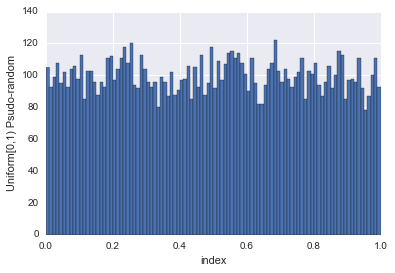

In [8]:
plt.hist(Prng, bins=100)
plt.xlabel('index')
plt.ylabel('Uniform[0,1) Psudo-random')
plt.grid(True)

#### Box-Muller for Normal Distribution (1-dim)

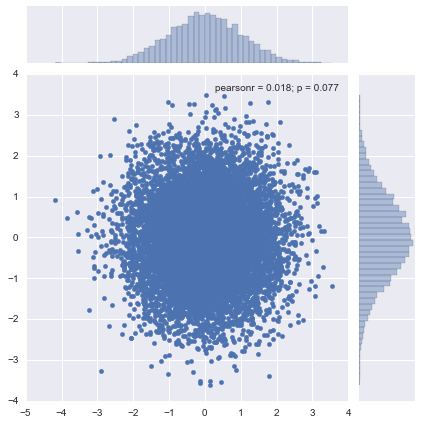

In [9]:
num_samples = 10000
np.random.seed(2)
u1 = np.random.random(num_samples)
u2 = np.random.random(num_samples)
r_squared = -2*np.log(u1)
r = np.sqrt(r_squared)
theta = 2*np.pi*u2
x = r*np.cos(theta)
y = r*np.sin(theta)
sns.jointplot(x, y, kind='scatter');


In [11]:
num_samples = 10000
cov_mat = np.array([
        [3.4,-2.75,-2.0],
        [-2.75,5.5,1.5],
        [-2.0,1.5,1.25]
    ])

#### Correlated Random Samples (Choleskey/Eigenvector Method)

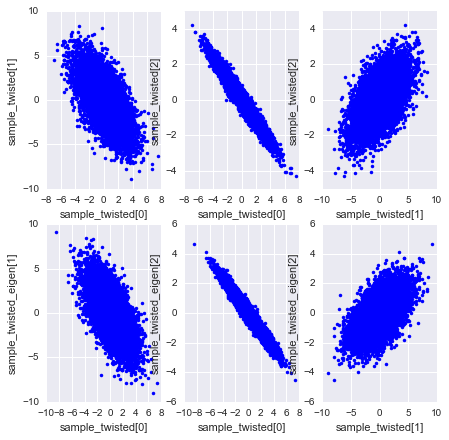

In [12]:
# generating
np.random.seed(3)
sample = stats.norm.rvs(size=(3,num_samples))
#cholesky
transform = scipy.linalg.cholesky(cov_mat,lower=True)  
sample_twisted = np.dot(transform, sample)
#eigenvec
evals, evecs = scipy.linalg.eigh(cov_mat)
transform = np.dot(evecs, np.diag(np.sqrt(evals)))
sample_twisted2 = np.dot(transform, sample)

# plot
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3,
                                   figsize=(7,7))
ax1.plot(sample_twisted[0],sample_twisted[1],'b.')
ax1.set_ylabel('sample_twisted[1]')
ax1.set_xlabel('sample_twisted[0]')
ax1.grid(True)
ax2.plot(sample_twisted[0],sample_twisted[2],'b.')
ax2.set_ylabel('sample_twisted[2]')
ax2.set_xlabel('sample_twisted[0]')
ax2.grid(True)
ax3.plot(sample_twisted[1],sample_twisted[2],'b.')
ax3.set_ylabel('sample_twisted[2]')
ax3.set_xlabel('sample_twisted[1]')
ax3.grid(True)
ax4.plot(sample_twisted2[0],sample_twisted2[1],'b.')
ax4.set_ylabel('sample_twisted_eigen[1]')
ax4.set_xlabel('sample_twisted[0]')
ax4.grid(True)
ax5.plot(sample_twisted2[0],sample_twisted2[2],'b.')
ax5.set_ylabel('sample_twisted_eigen[2]')
ax5.set_xlabel('sample_twisted[0]')
ax5.grid(True)
ax6.plot(sample_twisted2[1],sample_twisted2[2],'b.')
ax6.set_ylabel('sample_twisted_eigen[2]')
ax6.set_xlabel('sample_twisted[1]')
ax6.grid(True)   

In [95]:
Chole_mat = np.cov(sample_twisted)
Eigen_mat = np.cov(sample_twisted2)
print('Sample covariance from Cholesky is: ')
print(Chole_mat)
print('Sample covariance from Eigen is: ')
print(Eigen_mat)
print('Theoretical covariance is: ')
print(cov_mat)

Sample covariance from Cholesky is: 
[[ 3.452  -2.8282 -2.0333]
 [-2.8282  5.5772  1.5536]
 [-2.0333  1.5536  1.2709]]
Sample covariance from Eigen is: 
[[ 3.3715 -2.7517 -1.9825]
 [-2.7517  5.5436  1.5065]
 [-1.9825  1.5065  1.2398]]
Theoretical covariance is: 
[[ 3.4  -2.75 -2.  ]
 [-2.75  5.5   1.5 ]
 [-2.    1.5   1.25]]


### Quasi Random Number

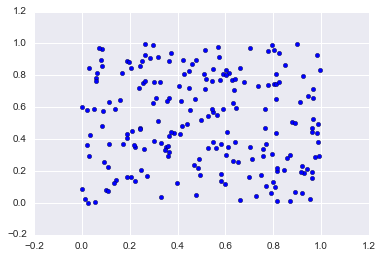

In [16]:
np.random.seed(5)
X = np.random.uniform(size = 400)
plt.scatter(X[:200],X[200:])

### Monte Carlo Simulation for integral approximation

$  \int_{0}^{1}  e^{x} dx $    example

In [36]:
%precision 11
# using scipy method quadature (not efficient for high dimension)
scipy.integrate.quad(np.exp,0,1)

(1.71828182846, 0.00000000000)

In [39]:
# Analytical solution
np.e - 1

2.71828182846

In [37]:
# Monte Carlo Simulation Solutio
for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0,1,(n,2))
    pts[:,1]*=np.e

array([       10,       100,      1000,     10000,    100000,   1000000,
        10000000, 100000000])